In [1]:
import json
import matplotlib.pyplot as plt
import os

In [2]:
ylim = [0, 10] # 이미지 개수 plot 띄울 때 y 범위
json_name = 'hobbang.json' # 새로 만들 json 파일 이름
origin_json_path = '../dataset/train.json'     # train.json 위치
num_of_obj = 40 # 한 이미지에 num_of_obj개 이상의 객체가 포함되어 있으면 삭제하겠다.

In [3]:
json_data = None
lst = [0]*4885 # lst: 이미지 번호가 인덱스, 객체의 개수가 요소

with open(origin_json_path, 'r') as f:
    json_data = json.load(f)

for annot in json_data['annotations']:
    lst[annot['image_id']] += 1

counts = [0]*(max(lst)+1) # counts: 이미지 내에 존재하는 객체의 개수가 인덱스, [index]개의 요소를 가진 이미지의 개수가 요소

for i in lst:
    if i == 0:
        continue
    else:
        counts[i] += 1

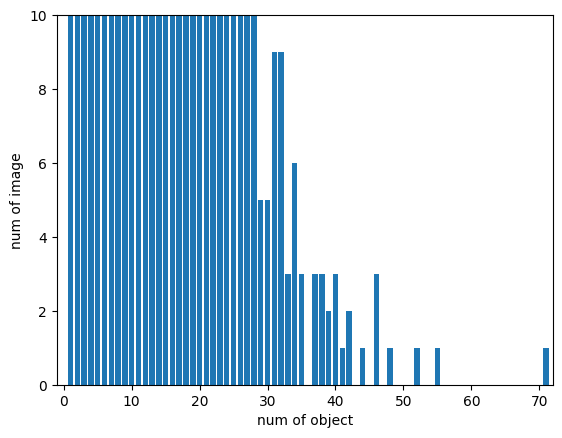

In [4]:
# x개의 object를 가진 이미지 y개 확인
plt.bar([i for i in range(max(lst)+1)], counts)
plt.ylim(ylim)
plt.xlim([-1, 72])
plt.xlabel('num of object')
plt.ylabel('num of image')
plt.show()

In [12]:
remove_ids = []
for i in range(num_of_obj, max(lst)+1): # i == 객체의 개수, counts[i] == i개의 객체를 가진 이미지의 개수, lst[i] == i번 이미지가 가진 객체의 개수
    if counts[i] == 0:
        continue
    print(f'{i}개의 객체를 가진 이미지의 개수 {counts[i]}:', end=' ')
    num = counts[i]
    start = 0
    while num > 0:
        now = lst[start:].index(i)
        print(now+start, end=', ')
        remove_ids.append(now+start)
        start+=now+1
        num-=1
    print()

40개의 객체를 가진 이미지의 개수 3: 2521, 3825, 4778, 
41개의 객체를 가진 이미지의 개수 1: 4841, 
42개의 객체를 가진 이미지의 개수 2: 1797, 4492, 
44개의 객체를 가진 이미지의 개수 1: 1678, 
46개의 객체를 가진 이미지의 개수 3: 1955, 2416, 2981, 
48개의 객체를 가진 이미지의 개수 1: 394, 
52개의 객체를 가진 이미지의 개수 1: 4047, 
55개의 객체를 가진 이미지의 개수 1: 946, 
71개의 객체를 가진 이미지의 개수 1: 4197, 
653


In [6]:
# json 생성
new_json = {
    'info': json_data['info'], 
    'licenses': json_data['licenses'], 
    'categories': json_data['categories'], 
    'images': [], 
    'annotations': []
}

for image in json_data['images']:
    if image['id'] in remove_ids:
        continue
    else:
        new_json['images'].append(image)

for annot in json_data['annotations']:
    if annot['image_id'] in remove_ids:
        continue
    else:
        new_json['annotations'].append(annot)

with open(os.path.join('../dataset/', json_name), 'w') as f:
    f.write(json.dumps(new_json, ensure_ascii=False, indent='\t'))
f.close()